# Análise descritiva dos dados tratados

## Importações das bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Funções

### Ajustes de nomes das caterogias e colunas

Ajustes para exibir os dados sem a falta de acentos e abreviações

In [4]:
def ajustes_nomes(data):
    """Ajustes em variáveis para melhor exibição dos resultados
    - A coluna 'Genero' foi trocado para 'Gênero' 
    - Os valores Fem e Masc foram trocados por Feminino e Masculino
    - O valor Pós graduação foi trocado por Pós-graduação (correção ortográfica)

    Args:
        data (dataframe): a base de dados de funcionários

    Returns:
        data (dataframe): a base de dados de funcionários com os nomes melhorados
    """
    data["Genero"] = data["Genero"].map({"Fem": "Feminino", "Masc": "Masculino"})
    # Renomeando a coluna 'Genero' para 'Gênero'
    data.rename(columns={"Genero": "Gênero"}, inplace=True)
    data['Formação'] = data['Formação'].replace('Pós graduação', 'Pós-graduação')
    
    return data

### Análise de Qualidade da base
- Quantidade de registos
- Categorias
- Valores faltantes

In [5]:
def analise_base(data):
    """
    A função informa na tela informações sobre a qualidade dos dados
    
    Args:
        data (dataframe): a base de dados de funcionários
    """
    total_linhas = len(data)
    total_linhas_com_nulos = data.isnull().any(axis=1).sum()

    print(f'A Base de Dados disponível tem {total_linhas} registros.\n')
    print(f'Há {total_linhas_com_nulos} linhas com algum registro nulo.')
    print('Distribuídos da seguinte forma:')

    # Verificar valores ausentes
    print("\nValores ausentes no conjunto de dados:")
    print(data.isnull().sum())

    # Estatísticas descritivas para as colunas numéricas
    print("\nEstatísticas descritivas para as colunas numéricas:")
    print(data[['Idade','Tempo de casa','Idade Ingresso']].describe().round(2))

    print("Descrição das Variáveis Categóricas:\n")
    lista_cateoricas = ['Gênero', 'Raça', 'Formação', 'Departamento', 'Senioridade']
    for i in lista_cateoricas:
        print(f"Opções disponíveis de {i}:\n{data[i].unique()}\n")

### Elaboração de Gráficos

As funções a seguir, fazem gráficos de barra com as proporções das variáveis qualitativas e as exportam como png

In [15]:
def graf_barra(data, x, y, eixo):
    """
    A função faz e estiliza um gráfico de barras

    Args:
        data (dataframe): a base de dados de funcionários
        x (integer): tamanho da altura do gráfico
        y (interger): valor da largura do gráfico
        eixo (string): nome do eixo do dataframe data que será feito o gráfico

    Returns:
        plot (matplotlib.axes._subplots.AxesSubplot): variável que armazena o gráfico
    """
    plt.ioff()  # Desativar a exibição automática de gráficos
    plt.rcParams['axes.facecolor'] = 'AliceBlue'

    # Calcular o limite máximo do eixo y
    max_y = data[eixo].value_counts().max()
    # Adicionar 10% ao limite máximo
    ylim_max = max_y * 1.3
    
    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(x, y))
    
    # Gráfico de barras para a variável 'eixo' com cor personalizada
    plot = sns.countplot(data=data, x=eixo, color='DarkTurquoise', ax=ax)
    ax.set_title(eixo, fontsize=18, fontweight='bold')
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
    ax.tick_params(axis='x', rotation=0)
    ax.spines['top'].set_visible(False)  # Remover a linha superior
    ax.spines['right'].set_visible(False)  # Remover a linha direita
    ax.spines['left'].set_visible(False)  # Remover a linha esquerda
    ax.set_ylim(0, ylim_max)  # Definindo o limite do eixo y
    ax.set_yticks([])  # Remover os números dos tiques do eixo y
    ax.yaxis.grid(False)  # Remover os "risquinhos"

    # Definir os tiques do eixo x e substituir espaços nos nomes das colunas por quebras de linha
    ax.set_xticks(range(len(ax.get_xticklabels())))
    ax.set_xticklabels([label.get_text().replace(' ', '\n') for label in ax.get_xticklabels()])

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}\n{p.get_height() / len(data) * 100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                    textcoords='offset points')
    plt.tight_layout()
    
    #plt.ion()  # Restaurar a exibição automática de gráficos
    return plot

In [7]:
def export_plot(plot, file_path, format='png'):
    """
    Exporta um gráfico matplotlib ou seaborn para um arquivo.
    
    Parâmetros:
        - plot: O gráfico a ser exportado.
        - file_path: O caminho do arquivo de destino.
        - format: O formato do arquivo de destino (padrão: 'png').
    """
    try:
        plot.figure.savefig(file_path, format=format)
        print(f"Gráfico exportado com sucesso para {file_path}")
    except Exception as e:
        print(f"Erro ao exportar o gráfico: {e}")

In [8]:
def exportando_graficos(data):
    """
    A função agrupa as exportações dos gráficos de:
        - Gênero,
        - Senioridade,
        - Raça e 
        - Formação

    Args:
        data (dataframe): a base de dados de funcionários
    """
    eixo = 'Gênero'
    plot = graf_barra(data, 4,3, eixo)
    formato = 'png'
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Senioridade'
    plot = graf_barra(data, 5,3, eixo)
    formato = 'png'
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Raça'
    plot = graf_barra(data, 4,3, eixo)
    formato = 'png'
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Formação'
    plot = graf_barra(data, 5,3, eixo)
    formato = 'png'
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)
    
    eixo = 'Departamento'
    plot = graf_barra(data, 10,3, eixo)
    formato = 'png'
    caminho = f'Graph/Distribuição_{eixo}.{formato}'
    export_plot(plot, caminho, formato)

# Main

In [16]:
# Carregar o conjunto de dados
file_path = "Data_Base\\Dados_filtrados\\base_dados_filtrados.csv"
data = pd.read_csv(file_path)

data = ajustes_nomes(data)
print("Análise da qualidade do banco de dados")
analise_base(data)

print("Exportação dos gráficos")
exportando_graficos(data)

Análise da qualidade do banco de dados
A Base de Dados disponível tem 9879 registros.

Há 225 linhas com algum registro nulo.
Distribuídos da seguinte forma:

Valores ausentes no conjunto de dados:
id                  0
Nome                0
Gênero              0
Idade               0
Raça                0
Formação           26
Estado              0
Tempo de casa     199
Departamento        0
Senioridade         0
Idade Ingresso    199
dtype: int64

Estatísticas descritivas para as colunas numéricas:
         Idade  Tempo de casa  Idade Ingresso
count  9879.00        9680.00         9680.00
mean     31.71           5.27           26.44
std       8.01           2.68            8.05
min      15.00           0.00           14.00
25%      26.00           4.00           20.00
50%      30.00           5.00           25.00
75%      37.00           7.00           31.00
max      74.00          17.00           69.00
Descrição das Variáveis Categóricas:

Opções disponíveis de Gênero:
['Feminino' 

# ideia de pirâmide etária

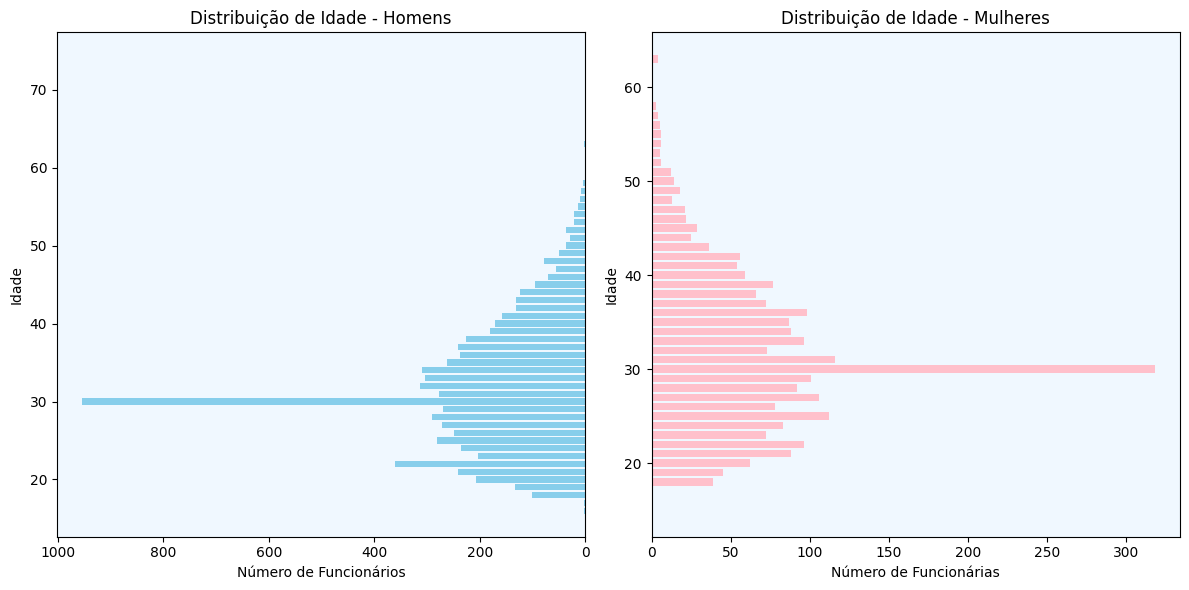

In [14]:
# Dividir o DataFrame em dois grupos: homens e mulheres
homens = data[data['Gênero'] == 'Masculino']
mulheres = data[data['Gênero'] == 'Feminino']

# Calcular a distribuição de idade para homens e mulheres
idade_homens = homens['Idade'].value_counts().sort_index()
idade_mulheres = mulheres['Idade'].value_counts().sort_index()

# Inverter a distribuição de idade dos homens e mulheres para criar a pirâmide etária
idade_homens = idade_homens[::-1]
idade_mulheres = idade_mulheres[::-1]

# Criar a pirâmide etária
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.barh(idade_homens.index, idade_homens, color='skyblue')
plt.title('Distribuição de Idade - Homens')
plt.xlabel('Número de Funcionários')
plt.ylabel('Idade')
plt.gca().invert_xaxis()  # Espelhar o gráfico masculino

plt.subplot(1, 2, 2)
plt.barh(idade_mulheres.index, idade_mulheres, color='pink')
plt.title('Distribuição de Idade - Mulheres')
plt.xlabel('Número de Funcionárias')
plt.ylabel('Idade')

plt.tight_layout()
plt.show()